## Logistic Regression

In [18]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import time

In [19]:
#Here is a case of Binary data
# drop the row with at least one element missing
#row with at least one element missing is for testing
df = pd.read_csv('heart.csv').dropna()
#change the column names to be a bit clearer and be easy to understand
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Select all features, Get accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:13]
y = df['target']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3


In [22]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
start=time.time()
logReg.fit(x_train, y_train)
end = time.time()
print(end-start)

0.16410303115844727


In [23]:
y_pred = logReg.predict(x_test)

In [24]:
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 1 0]


In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.881578947368421


Based on the obtained accuracy score of 0.90789, the provided features is an efficient way to predict the presence of cardiovascular disease.

Accuracy score for individual features

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
name_list = []
accuracy = []
for name in df.columns:
    name_list.append(name)

y = df['target']
for cn in name_list:  
    x = df.iloc[:,name_list.index(cn):name_list.index(cn)+1]   
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=40)    
    logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state=40)
    logReg.fit(x, y)
    y_pred = logReg.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print(cn+"'s accuracy =",accuracy_score(y_test, y_pred))

age's accuracy = 0.618421052631579
sex's accuracy = 0.6447368421052632
chest_pain_type's accuracy = 0.7763157894736842
resting_blood_pressure's accuracy = 0.5263157894736842
cholesterol's accuracy = 0.5657894736842105
fasting_blood_sugar's accuracy = 0.5526315789473685
rest_ecg's accuracy = 0.6052631578947368
max_heart_rate_achieved's accuracy = 0.6842105263157895
exercise_induced_angina's accuracy = 0.7763157894736842
st_depression's accuracy = 0.7368421052631579
st_slope's accuracy = 0.7631578947368421
num_major_vessels's accuracy = 0.75
thalassemia's accuracy = 0.7763157894736842
target's accuracy = 1.0


In [27]:
# sort accuracy for each feature in reverse order
ls =np.stack((name_list, accuracy), axis=0)
xx = ls.T[np.lexsort(ls)].T
newls= np.stack((xx[0,][12::-1],xx[1,][12::-1]),axis=0)
newls.T

array([['thalassemia', '0.7763157894736842'],
       ['exercise_induced_angina', '0.7763157894736842'],
       ['chest_pain_type', '0.7763157894736842'],
       ['st_slope', '0.7631578947368421'],
       ['num_major_vessels', '0.75'],
       ['st_depression', '0.7368421052631579'],
       ['max_heart_rate_achieved', '0.6842105263157895'],
       ['sex', '0.6447368421052632'],
       ['age', '0.618421052631579'],
       ['rest_ecg', '0.6052631578947368'],
       ['cholesterol', '0.5657894736842105'],
       ['fasting_blood_sugar', '0.5526315789473685'],
       ['resting_blood_pressure', '0.5263157894736842']], dtype='<U32')

From the above list we then selected the top 5 features to calculate the accouracy score

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df.loc[:,['chest_pain_type','exercise_induced_angina','thalassemia','st_depression','st_slope']]
y = df['target']
x

,chest_pain_type,exercise_induced_angina,thalassemia,st_depression,st_slope
0,3,0,1,2.3,0
1,2,0,2,3.5,0
2,1,0,2,1.4,2
3,1,0,2,0.8,2
4,0,1,2,0.6,2
5,0,0,1,0.4,1
6,1,0,2,1.3,1
7,1,0,3,0.0,2
8,2,0,3,0.5,2
9,2,0,2,1.6,2


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 40)
x_train.head()

,chest_pain_type,exercise_induced_angina,thalassemia,st_depression,st_slope
151,0,0,2,1.6,1
292,0,1,1,2.8,1
289,0,1,3,2.0,1
0,3,0,1,2.3,0
209,0,1,3,0.0,2


In [30]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver = 'lbfgs',max_iter=1000,random_state = 40)
start=time.time()
logReg.fit(x, y)
end = time.time()
print(end-start)

0.021001338958740234


In [31]:
y_pred = logReg.predict(x_test)

In [32]:
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 1 1]


In [33]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9078947368421053


With the top 5 features, we managed to get an accuracy score of 0.90789 which is identical when all the 14 features were used. The computer run time taken with this is much shorter at 0.008966 compared to 0.130008 when all features were used. This would mean that the time taken to collect all the 14 features could be reduced, this would result in savings for both time and cost. 

Using the feature with the hightest accuracy to get the scatter diagram 

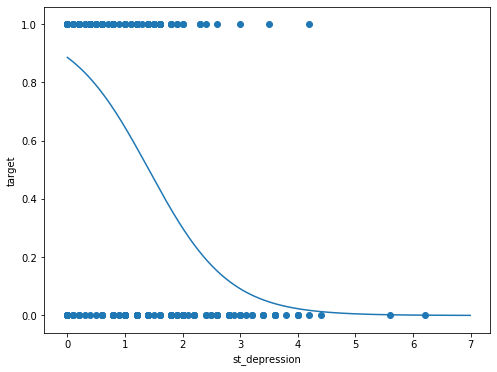

In [34]:
# We can visualize our model's sigmoid function
# to visualize the decision boundary, we  use the predicted probablity from our model
# our model will predict based on this curve
test_array = np.arange(0, 7, 0.01) # get a test array with x values from 0 to 7
test_prob = [] # the corresponding y values
# for each x value in the test array, we calculate what the probablity is given our model
for i in test_array:
    p_lost, p_win = logReg.predict_proba([[i,i,i,i,i]])[0]
    test_prob.append(p_win)
test_array = test_array.reshape(-1,1)
# plot the sigmoid function line
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(test_array, test_prob)
# plot the original data
ax.scatter(x['st_depression'], y)
ax.set(xlabel='st_depression', ylabel='target')
plt.show()